# Interpolation
Interpolation is the process of constructing a function that takes on specified values at specified points. In engineering and science, one often has a number of data points, obtained by sampling or experimentation, which represent the values of a function for a limited number of values of the independent variable. It is often required to interpolate (i.e. estimate) the value of that function for an intermediate value of the independent variable.

Smile package `smile.interpolation` provides a variety of algorithms on 1d and 2d data. These algorithms implements the interface Interpolation (or Interpolation2D for 2d data), of which the method interpolate takes a value and return an interploated value.

In [ ]:
import $ivy.`com.github.haifengl::smile-scala:2.2.2`
import $ivy.`org.slf4j:slf4j-simple:1.7.30` 

import java.awt.Color.{BLACK, BLUE, CYAN, DARK_GRAY, GRAY, GREEN, LIGHT_GRAY, MAGENTA, ORANGE, PINK, RED, WHITE, YELLOW}
import smile.interpolation._
import smile.plot.swing._
import smile.plot.show

System.setProperty("java.awt.headless", "true")
implicit def render(canvas: javax.swing.JComponent): Unit = {
  publish.html(smile.plot.swing.img(canvas))
}

## Piecewise Linear Interpolation
`LinearInterpolation` is quick and easy, but it is not very precise. Another disadvantage is that the interpolant is not differentiable at the control points.


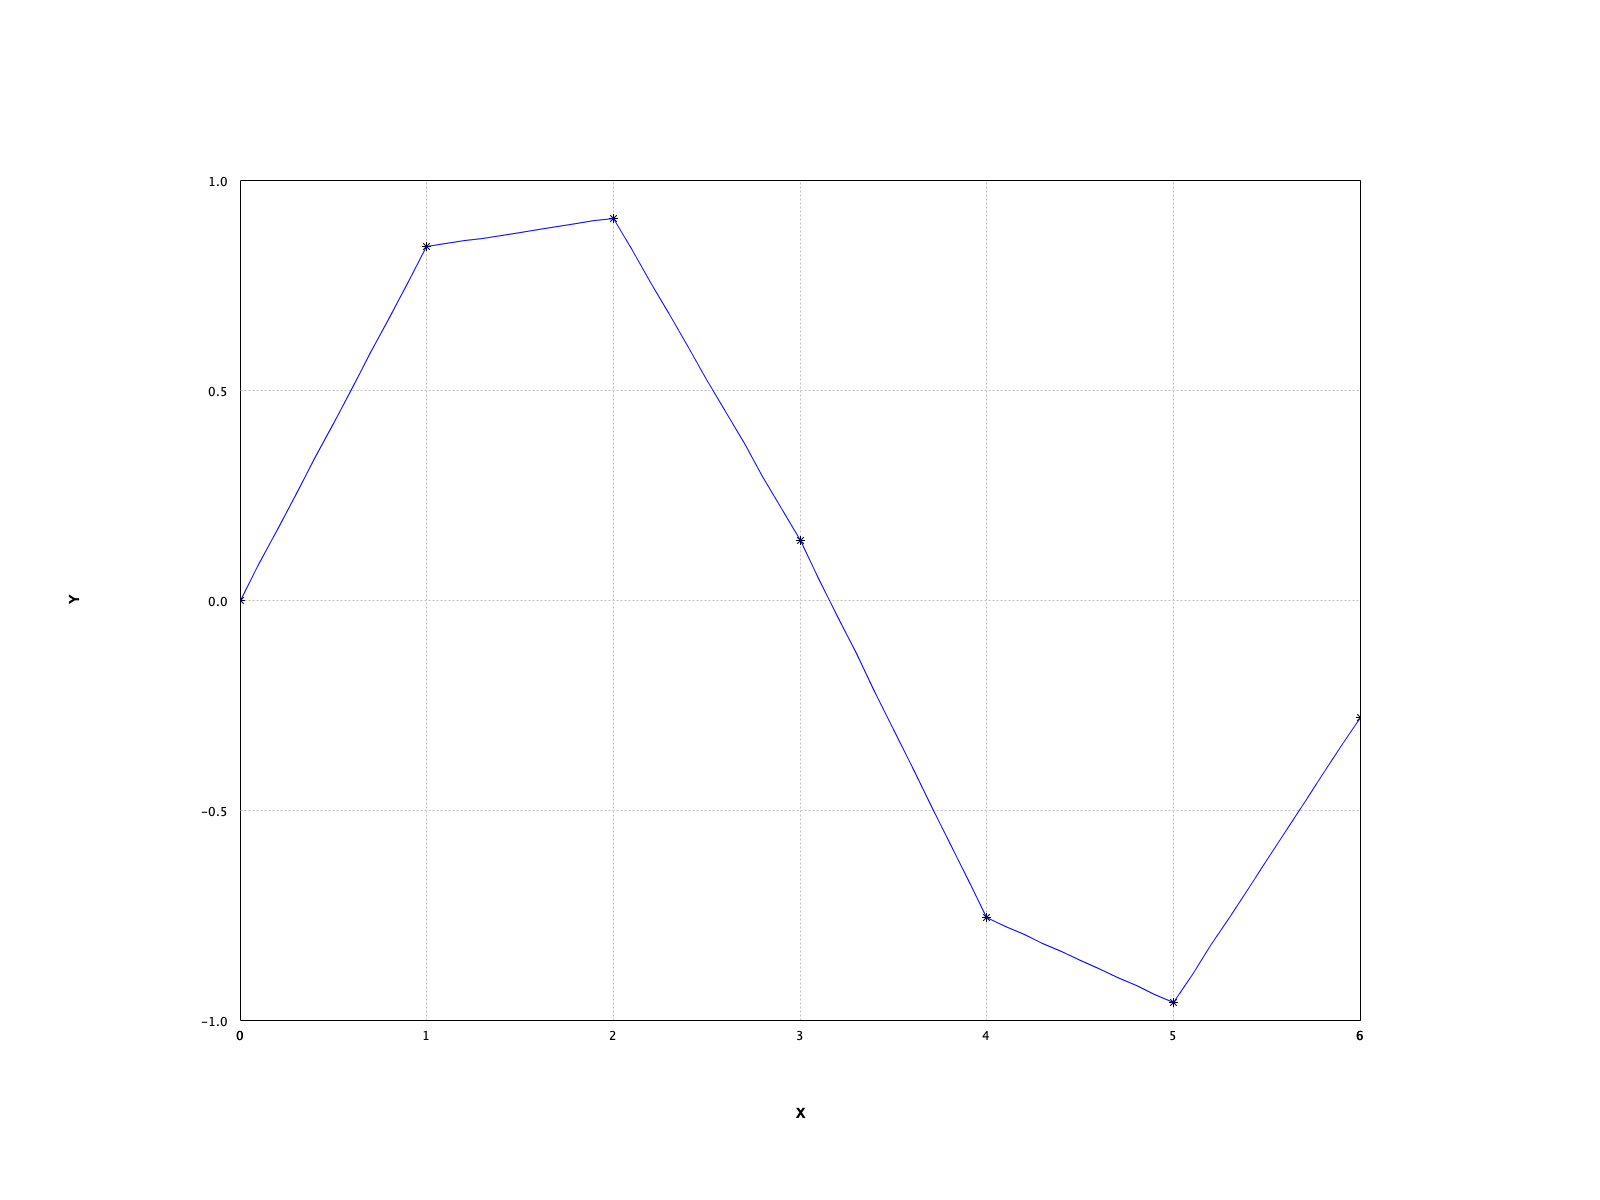

x: Array[Double] = Array(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)
y: Array[Double] = Array(0.0, 0.8415, 0.9093, 0.1411, -0.7568, -0.9589, -0.2794)
controls: Array[Array[Double]] = Array(
  Array(0.0, 0.0),
  Array(1.0, 0.8415),
  Array(2.0, 0.9093),
  Array(3.0, 0.1411),
  Array(4.0, -0.7568),
  Array(5.0, -0.9589),
  Array(6.0, -0.2794)
)
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
linear: LinearInterpolation = Linear Interpolation
data: Array[Array[Double]] = Array(
  Array(0.0, 0.0),
  Array(0.1, 0.08415),
  Array(0.2, 0.1683),
  Array(0.30000000000000004, 0.25245000000000006),
  Array(0.4, 0.3366),
  Array(0.5, 0.42075),
  Array(0.6000000000000001, 0.5049000000000001),
  Array(0.7000000000000001, 0.5890500000000001),
  Array(0.8, 0.6732),
  Array(0.9, 0.7573500000000001),
 

In [42]:
val x = Array(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0)
val y = Array(0.0, 0.8415, 0.9093, 0.1411, -0.7568, -0.9589, -0.2794)

val controls = Array.ofDim[Double](x.length, 2)
for (i <- 0 until x.length) {
  controls(i)(0) = x(i);
  controls(i)(1) = y(i);
}

val canvas = plot(controls, '*')

val linear = new LinearInterpolation(x, y)

val data = (0 to 60).map { i =>
      val x = i * 0.1
      val y = linear.interpolate(x)
      Array(x, y)
}.toArray

canvas.line("Linear", data, BLUE)

show(canvas)

`BilinearInterpolation` is an extension of linear interpolation for interpolating functions of two variables on a regular grid. The key idea is to perform linear interpolation first in one direction, and then again in the other direction.

## Cubic Spline Interpolation
Spline interpolation uses low-degree polynomials in each of the intervals, and chooses the polynomial pieces such that they fit smoothly together. The resulting function is called a spline. The natural cubic spline is piecewise cubic and twice continuously differentiable. Furthermore, its second derivative is zero at the end points.

Like polynomial interpolation, spline interpolation incurs a smaller error than linear interpolation and the interpolant is smoother. However, the interpolant is easier to evaluate than the high-degree polynomials used in polynomial interpolation. It also does not suffer from Runge's phenomenon.


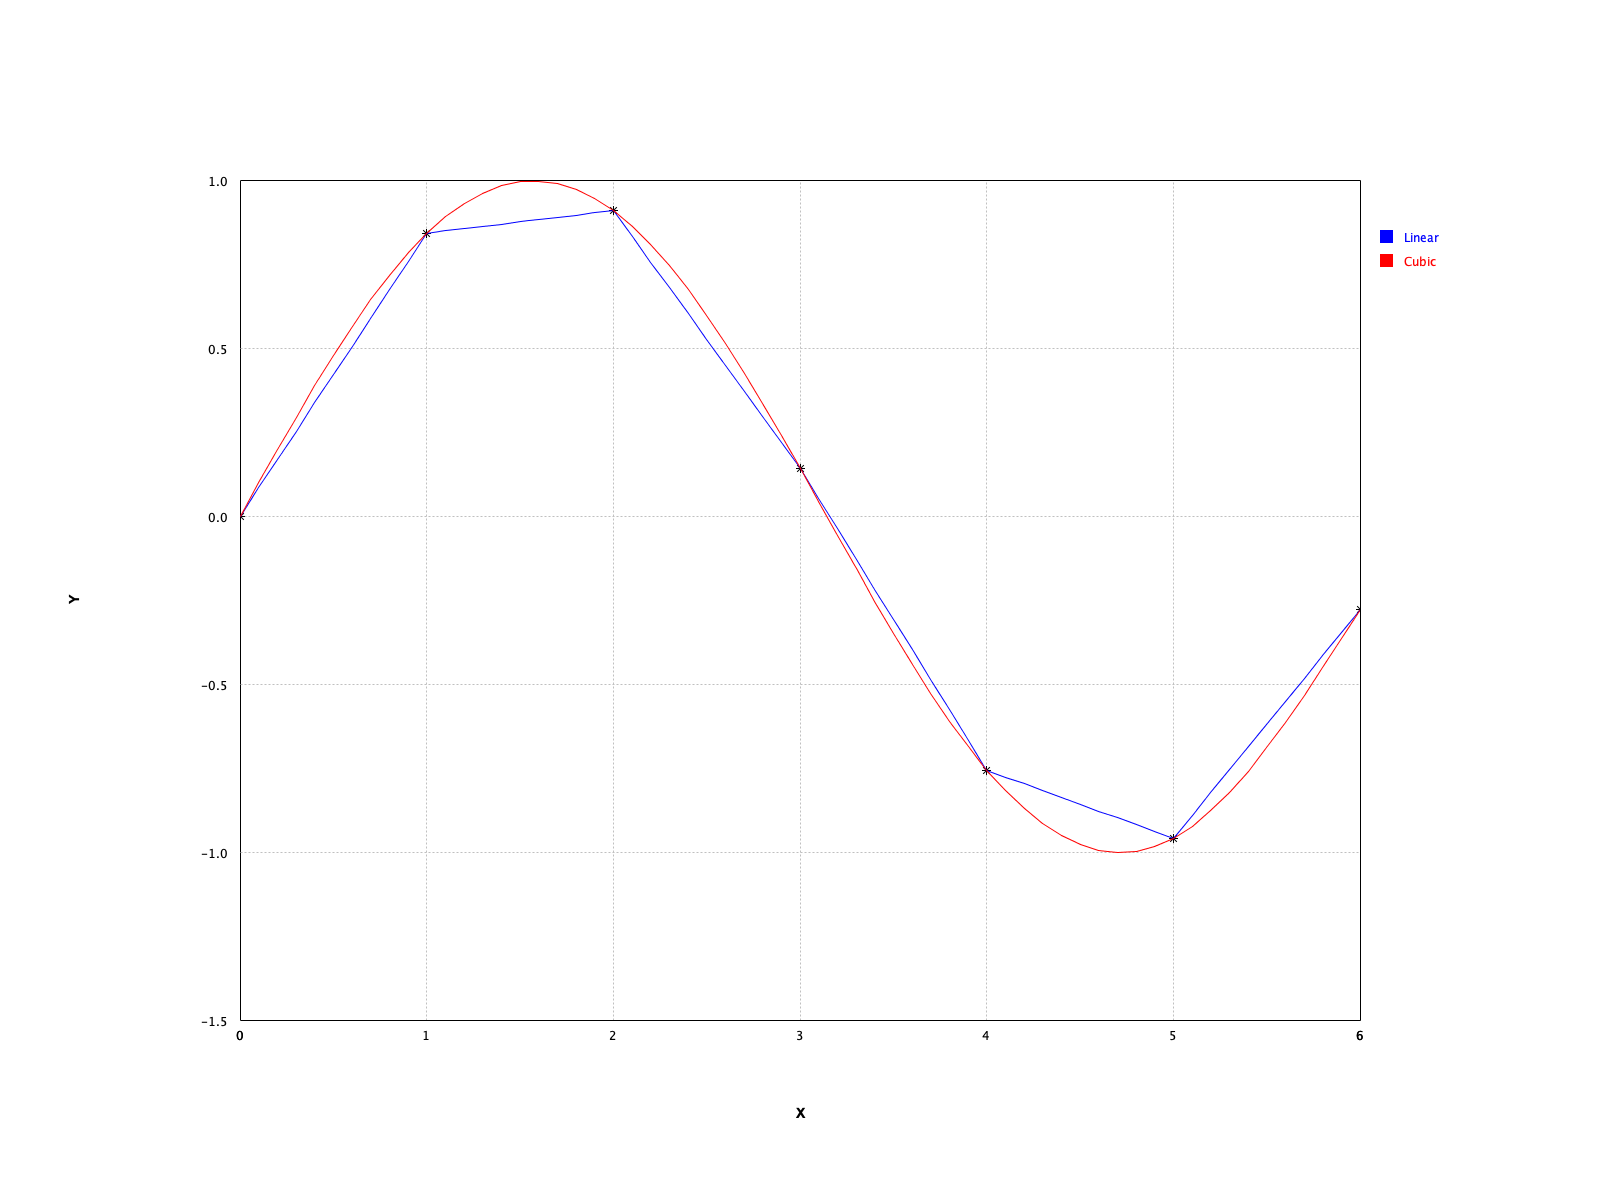

cubic: CubicSplineInterpolation1D = Cubic Spline Interpolation
data: Array[Array[Double]] = Array(
  Array(0.0, 0.0),
  Array(0.1, 0.0992201353846154),
  Array(0.2, 0.19752692923076925),
  Array(0.30000000000000004, 0.29400704000000005),
  Array(0.4, 0.38774712615384616),
  Array(0.5, 0.47783384615384616),
  Array(0.6000000000000001, 0.5633538584615386),
  Array(0.7000000000000001, 0.6433938215384616),
  Array(0.8, 0.7170403938461538),
  Array(0.9, 0.783380233846154),
  Array(1.0, 0.8415),
  Array(1.1, 0.8906259923076923),
  Array(1.2000000000000002, 0.930543076923077),
  Array(1.3, 0.9611757615384615),
  Array(1.4000000000000001, 0.9824485538461538),
  Array(1.5, 0.9942859615384615),
  Array(1.6, 0.9966124923076922),
  Array(1.7000000000000002, 0.9893526538461538),
  Array(1.8, 0.972430953846154),
  Array(1.9000000000000001, 0.9457719),
  Array(2.0, 0.9093),
  Array(2.1, 0.8630925953846154),
  Array(2.2, 0.807838363076923),
  Array(2.3000000000000003, 0.7443788138461538),
  Array(2.40

In [43]:
val cubic = new CubicSplineInterpolation1D(x, y)

val data = (0 to 60).map { i =>
      val x = i * 0.1
      val y = cubic.interpolate(x)
      Array(x, y)
}.toArray

canvas.line("Cubic", data, RED)
show(canvas)

## Kriging Interpolation
Kriging interpolation can be used for the data points irregularly distributed in space. Kriging belongs to the family of linear least squares estimation algorithms, also known as Gauss-Markov estimation or Gaussian process regression. We implement ordinary kriging for interpolation with power variogram.


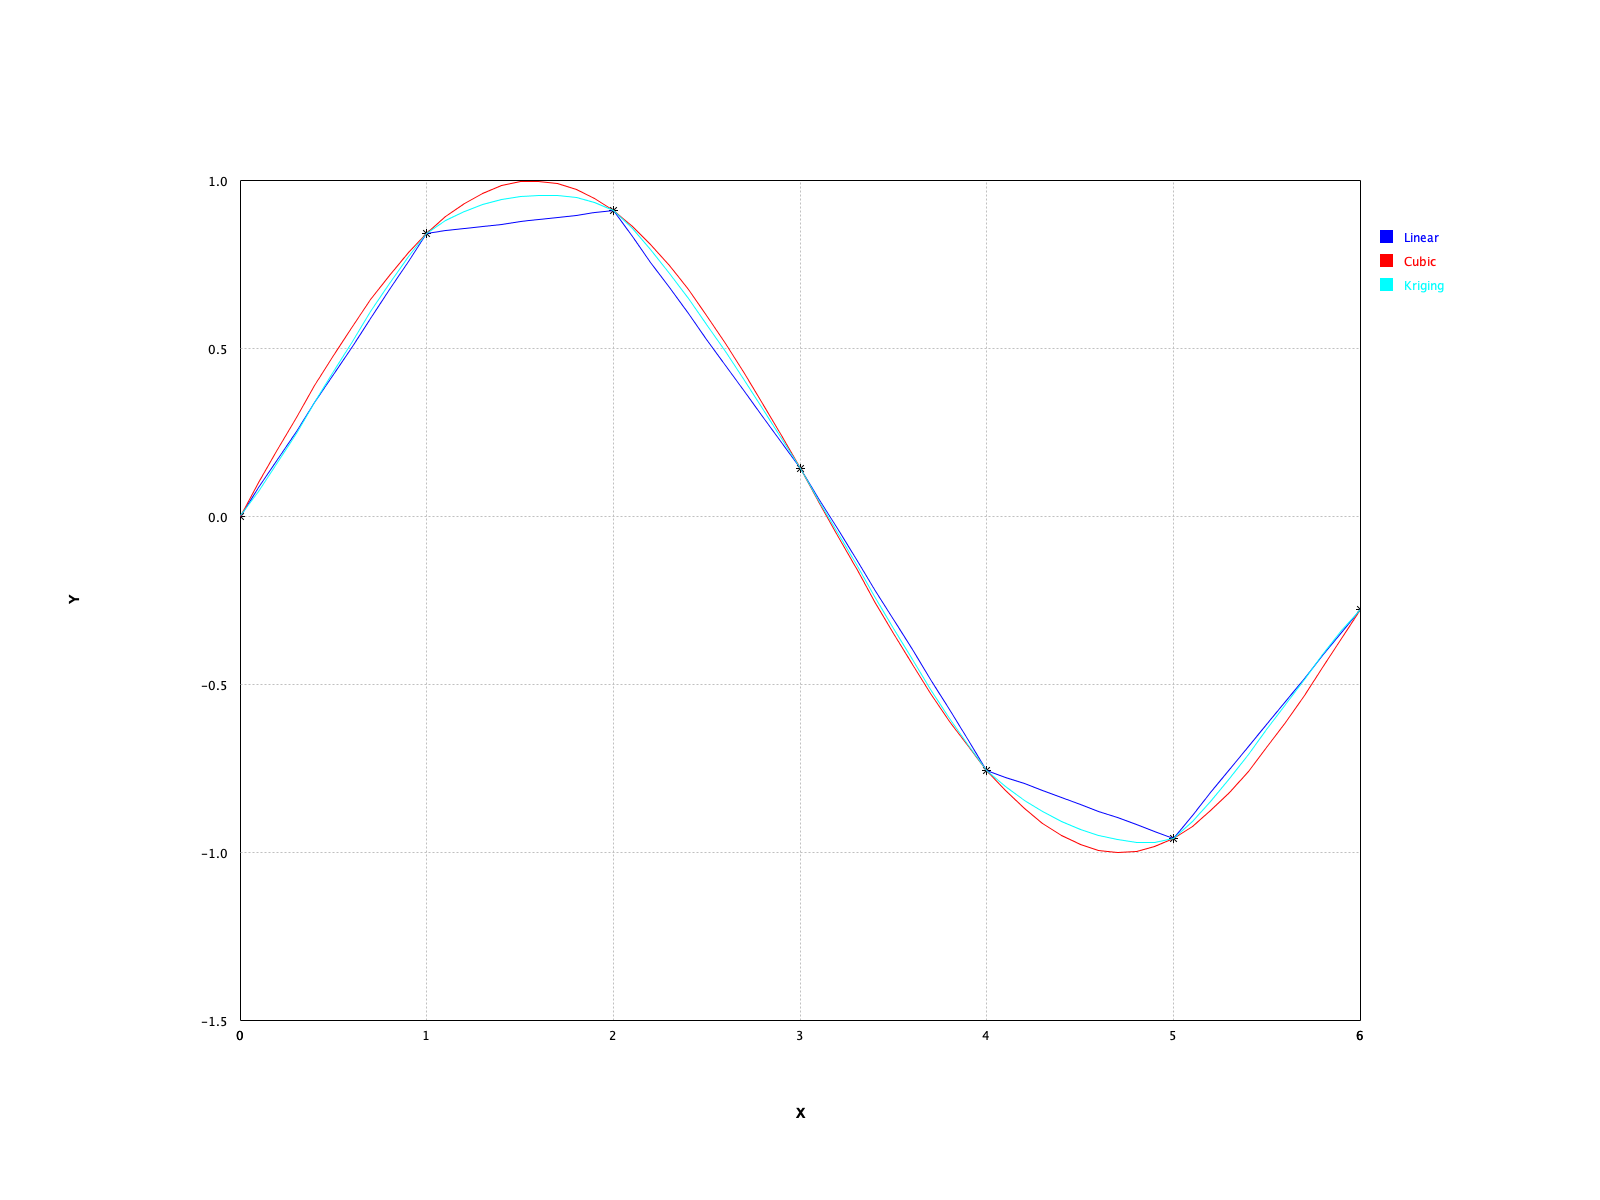

kriging: KrigingInterpolation1D = Kriging Interpolation
data: Array[Array[Double]] = Array(
  Array(0.0, 3.885780586188048E-16),
  Array(0.1, 0.07437746737707002),
  Array(0.2, 0.15850496737291614),
  Array(0.30000000000000004, 0.24693832068874272),
  Array(0.4, 0.3374842301123046),
  Array(0.5, 0.42864410415331505),
  Array(0.6000000000000001, 0.5191472300679547),
  Array(0.7000000000000001, 0.6077277045924467),
  Array(0.8, 0.6929068430455891),
  Array(0.9, 0.7725528251638969),
  Array(1.0, 0.8415000000000004),
  Array(1.1, 0.88001382288344),
  Array(1.2000000000000002, 0.9071099128518543),
  Array(1.3, 0.9272045378267353),
  Array(1.4000000000000001, 0.9416138778560739),
  Array(1.5, 0.9508859289964051),
  Array(1.6, 0.9551648048231178),
  Array(1.7000000000000002, 0.9542725366679323),
  Array(1.8, 0.9476454531257876),
  Array(1.9000000000000001, 0.9340111916126124),
  Array(2.0, 0.9092999999999996),
  Array(2.1, 0.8563429623571164),
  Array(2.2, 0.7926477701796788),
  Array(2.30000

In [44]:
val kriging = new KrigingInterpolation1D(x, y)
val data = Array.ofDim[Double](61, 2)
for (i <- 0 to 60) {
  data(i)(0) = i * 0.1
  data(i)(1) = kriging.interpolate(data(i)(0))
}

canvas.line("Kriging", data, CYAN)
show(canvas)

## RBF Interpolation
Radial basis function interpolation is a popular method for the data points are irregularly distributed in space. In its basic form, radial basis function interpolation is in the form `y(x) = Σ wi φ(||x-ci||)`, where the approximating function `y(x)` is represented as a sum of N radial basis functions φ, each associated with a different center ci, and weighted by an appropriate coefficient wi. For distance, one usually chooses euclidean distance. The weights wi can be estimated using the matrix methods of linear least squares, because the approximating function is linear in the weights.

The points ci often called the centers or collocation points of the RBF interpolant. Note also that the centers ci can be located at arbitrary points in the domain, and do not require a grid. For certain RBF exponential convergence has been shown. Radial basis functions were successfully applied to problems as diverse as computer graphics, neural networks, for the solution of differential equations via collocation methods and many other problems.

Other popular choices for φ comprise the Gaussian function and the so called thin plate splines. Thin plate splines result from the solution of a variational problem. The advantage of the thin plate splines is that their conditioning is invariant under scalings. Gaussians, multi-quadrics and inverse multi-quadrics are infinitely smooth and and involve a scale or shape parameter, r0 > 0. Decreasing r0 tends to flatten the basis function. For a given function, the quality of approximation may strongly depend on this parameter. In particular, increasing r0 has the effect of better conditioning (the separation distance of the scaled points increases).

A variant on RBF interpolation is normalized radial basis function (NRBF) interpolation, in which we require the sum of the basis functions to be unity. NRBF arises more naturally from a Bayesian statistical perspective. However, there is no evidence that either the NRBF method is consistently superior to the RBF method, or vice versa.


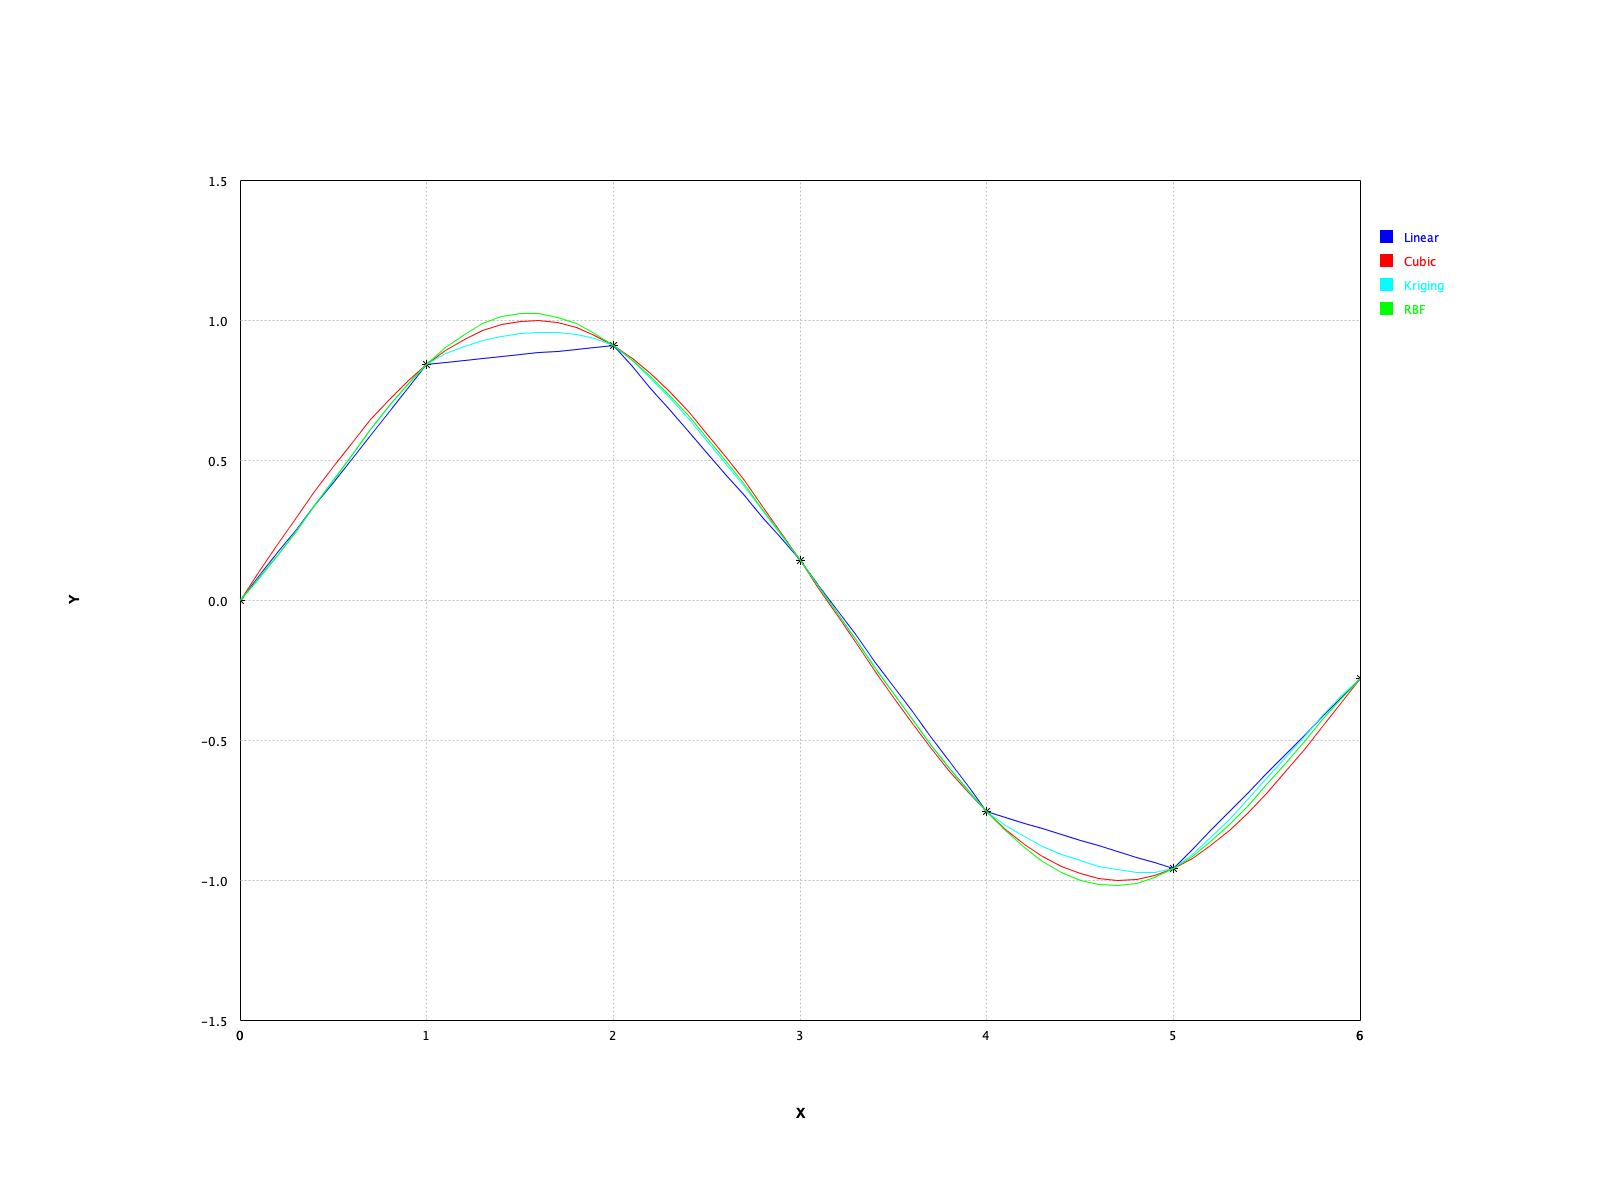

rbf: RBFInterpolation1D = RBF Interpolation(Gaussian Radial Basis (r0 = 1.0000))
data: Array[Array[Double]] = Array(
  Array(0.0, 6.919429186040998E-17),
  Array(0.1, 0.0752023978419881),
  Array(0.2, 0.15732474983699607),
  Array(0.30000000000000004, 0.24480278569052422),
  Array(0.4, 0.3358212262226251),
  Array(0.5, 0.4283808740587268),
  Array(0.6000000000000001, 0.5203760226304496),
  Array(0.7000000000000001, 0.6096775460141795),
  Array(0.8, 0.6942166131263916),
  Array(0.9, 0.7720639547025886),
  Array(1.0, 0.8415),
  Array(1.1, 0.9010719526506452),
  Array(1.2000000000000002, 0.9496349173770137),
  Array(1.3, 0.9863754213257259),
  Array(1.4000000000000001, 1.0108169810656518),
  Array(1.5, 1.0228086324821601),
  Array(1.6, 1.0224984599142843),
  Array(1.7000000000000002, 1.0102950477081485),
  Array(1.8, 0.98682037474283),
  Array(1.9000000000000001, 0.9528579549232432),
  Array(2.0, 0.9093),
  Array(2.1, 0.8570970788257299),
  Array(2.2, 0.7972132238413725),
  Array(2.300000

In [45]:
val rbf = new RBFInterpolation1D(x, y, new smile.math.rbf.GaussianRadialBasis())
val data = Array.ofDim[Double](61, 2)
for (i <- 0 to 60) {
  data(i)(0) = i * 0.1
  data(i)(1) = rbf.interpolate(data(i)(0))
}

canvas.line("RBF", data, GREEN)
show(canvas)

## Shepard Interpolation
Shepard interpolation is a special case of normalized radial basis function interpolation if the function φ(r) goes to infinity as `r → 0`, and is finite for `r > 0`. In this case, the weights wi are just equal to the respective function values yi. So we need not solve linear equations and thus it works for very large N. An example of such φ is `φ(r) = r^-p` with (typically) `1 < p ≤ 3`.


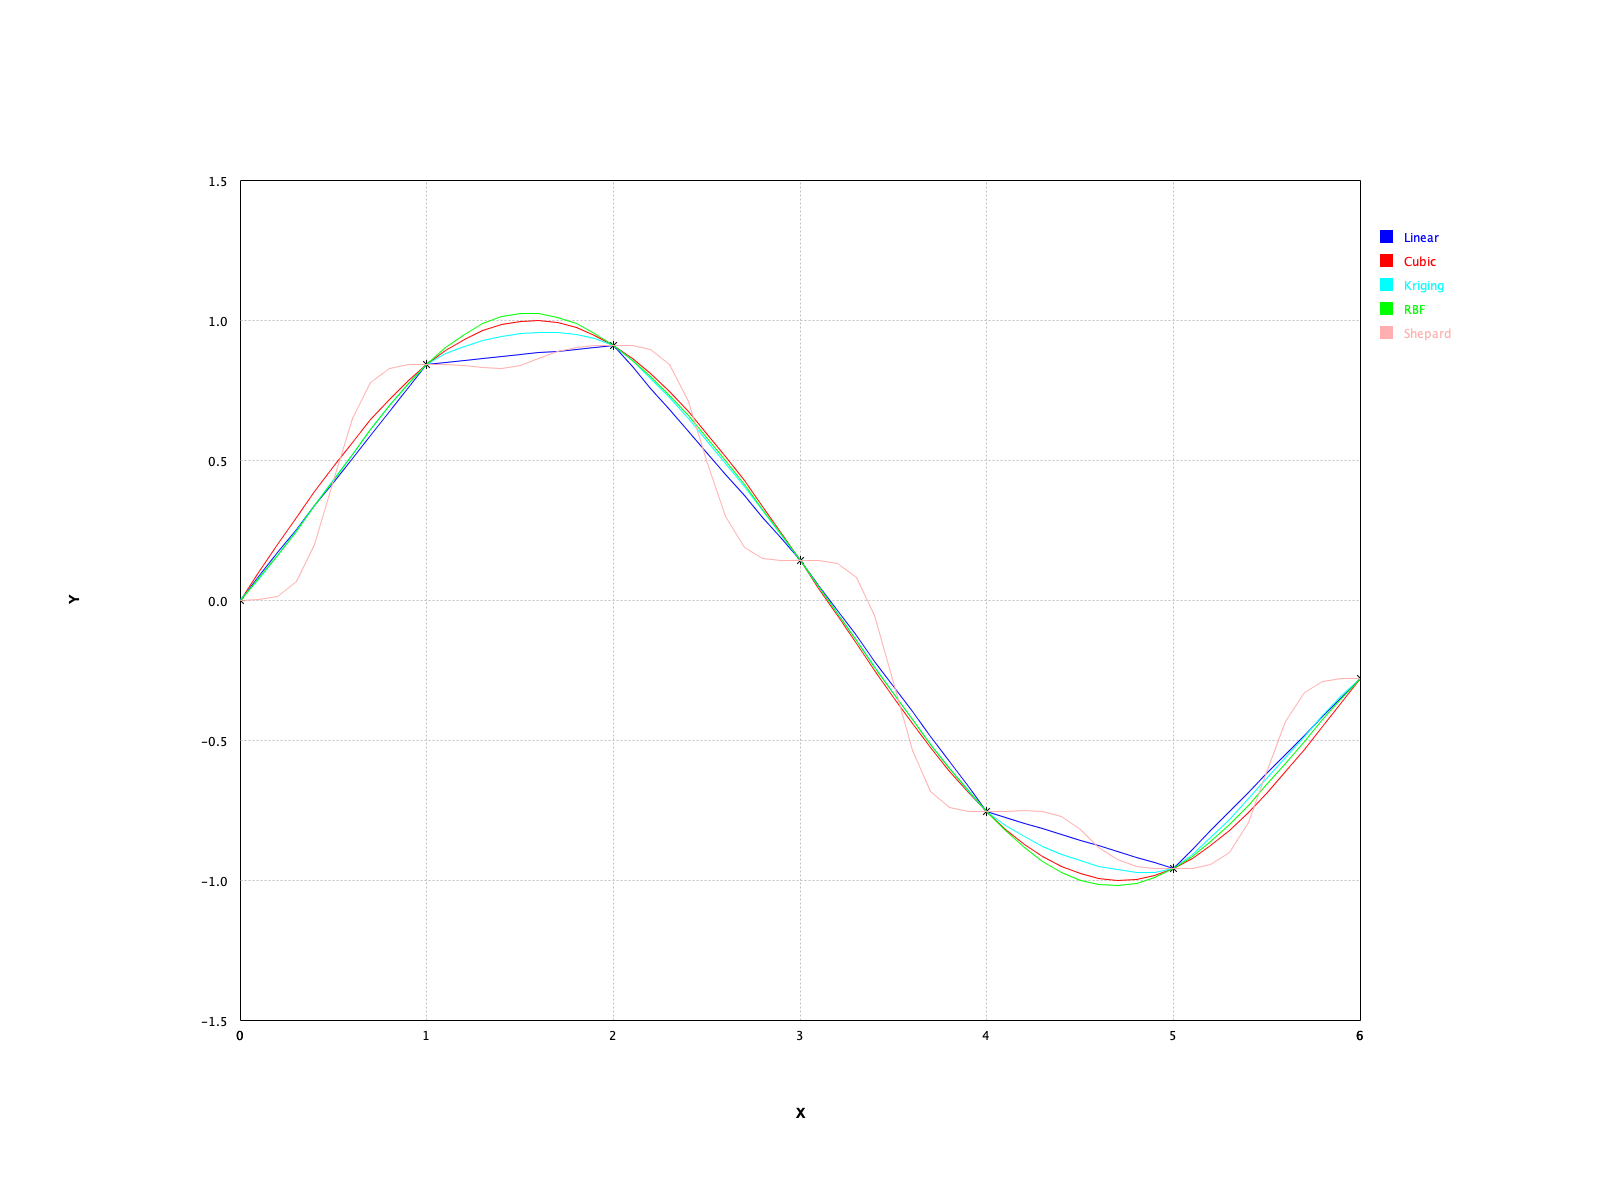

shepard: ShepardInterpolation1D = Shepard Interpolation(p = 3.0000)
data: Array[Array[Double]] = Array(
  Array(0.0, 0.0),
  Array(0.1, 0.0012683924852561427),
  Array(0.2, 0.014009180182303236),
  Array(0.30000000000000004, 0.06510466012209506),
  Array(0.4, 0.19900848414795344),
  Array(0.5, 0.4256305991673693),
  Array(0.6000000000000001, 0.6490368953145844),
  Array(0.7000000000000001, 0.778478344264358),
  Array(0.8, 0.8277845551350005),
  Array(0.9, 0.8402356571994082),
  Array(1.0, 0.8415),
  Array(1.1, 0.8407549861764869),
  Array(1.2000000000000002, 0.8368793514630759),
  Array(1.3, 0.8303070305373973),
  Array(1.4000000000000001, 0.8269514963800995),
  Array(1.5, 0.8372436073660954),
  Array(1.6, 0.8617214797663421),
  Array(1.7000000000000002, 0.8863146864250534),
  Array(1.8, 0.9017717104094963),
  Array(1.9000000000000001, 0.9082399734994031),
  Array(2.0, 0.9093),
  Array(2.1, 0.9077613025303495),
  Array(2.2, 0.8935213600983449),
  Array(2.3000000000000003, 0.84054441865

In [46]:
val shepard = new ShepardInterpolation1D(x, y, 3)
val data = Array.ofDim[Double](61, 2)
for (i <- 0 to 60) {
  data(i)(0) = i * 0.1
  data(i)(1) = shepard.interpolate(data(i)(0))
}

canvas.line("Shepard", data, PINK)
show(canvas)

Shepard interpolation is rarely as accurate as the well-tuned application of other radial basis functions. However, it is simple, fast, and often sufficient for quick and dirty applications.

## 2D Interpolation

For 2d grid, we provide two implementations: `CubicSplineInterpolation2D` and `BicubicInterpolation`. `CubicSplineInterpolation2D` is similar to one-dimensional splines as it guarantees the continuity of the first and second function derivatives.


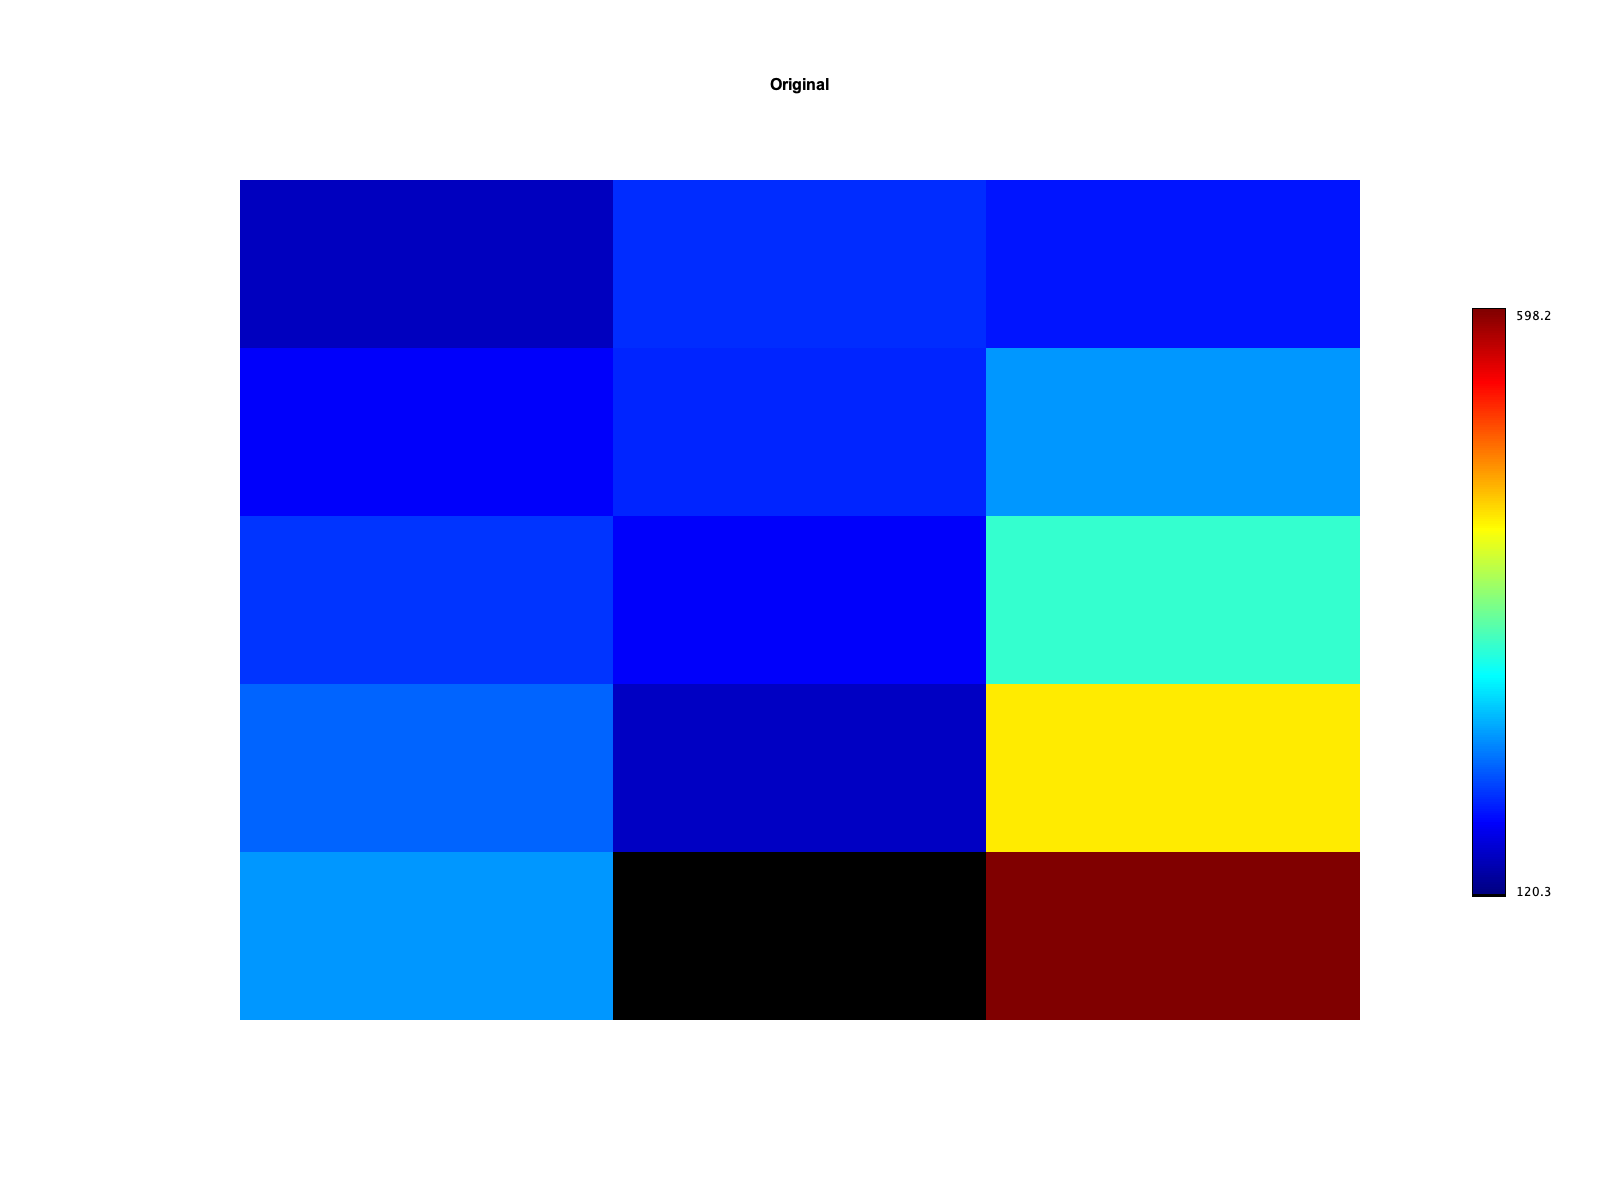


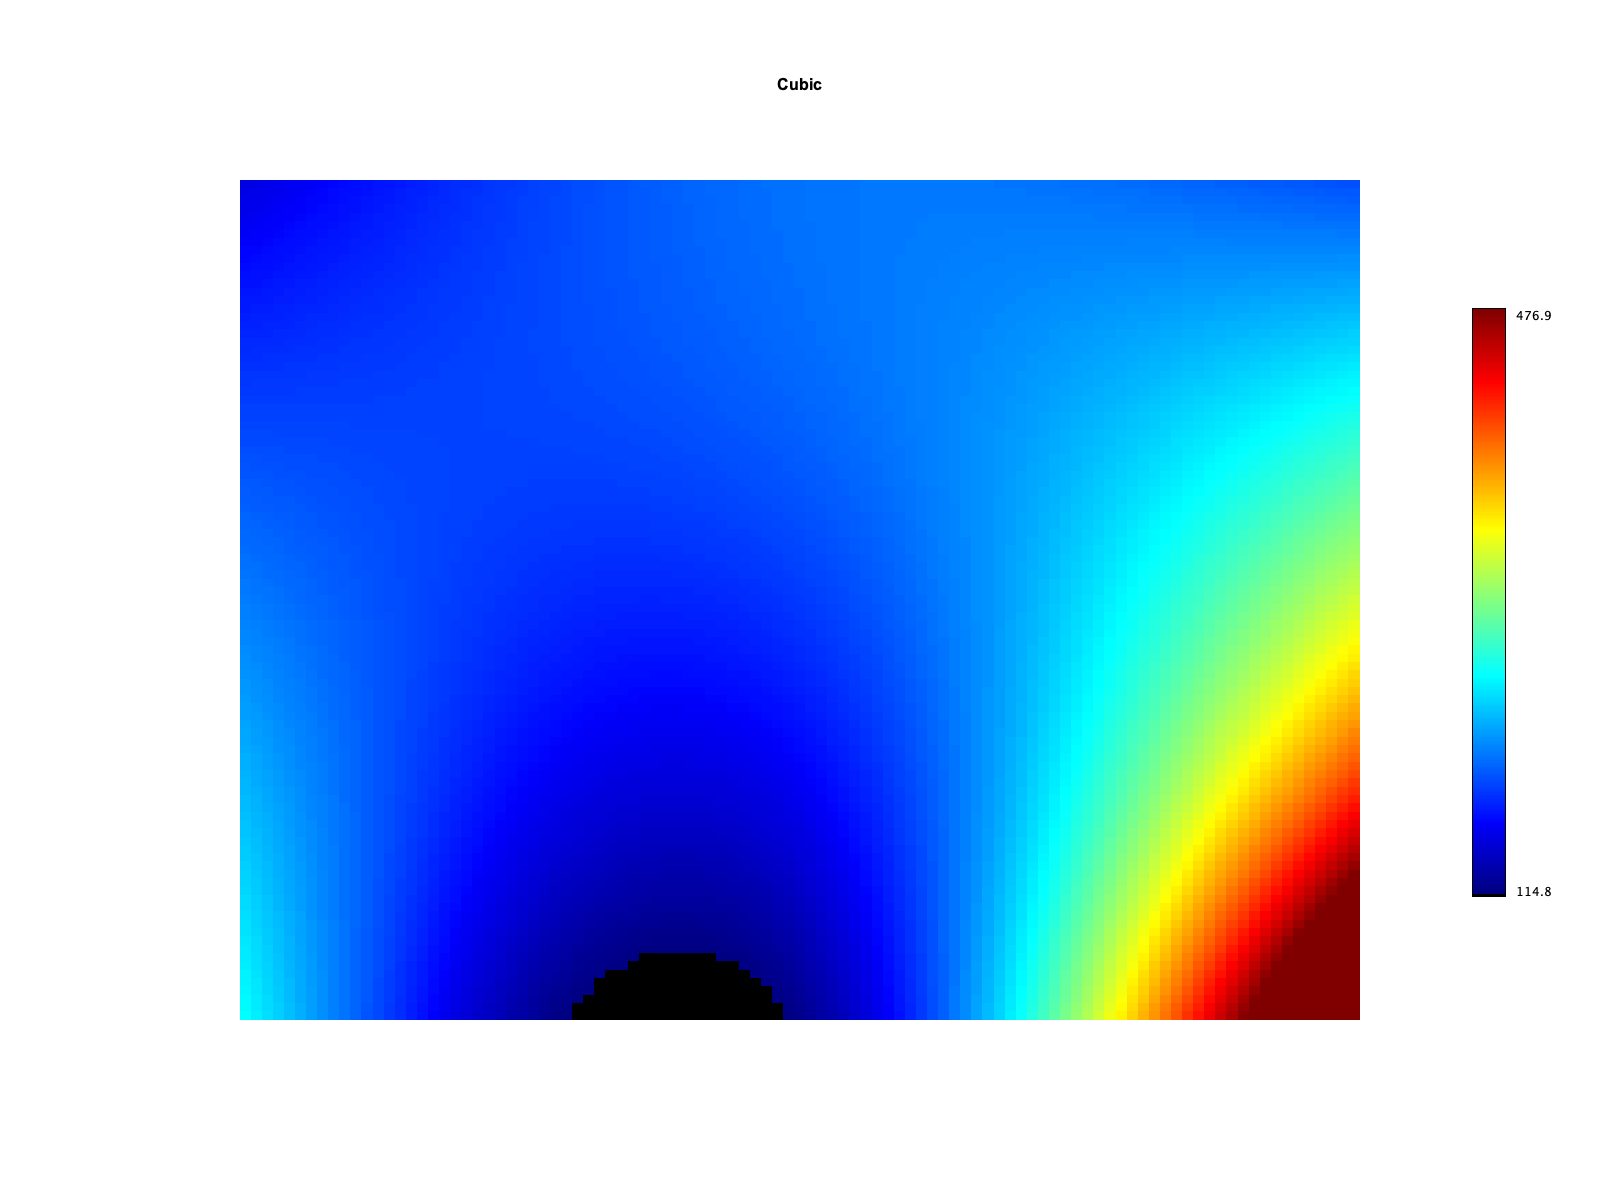

x1: Array[Double] = Array(1950.0, 1960.0, 1970.0, 1980.0, 1990.0)
x2: Array[Double] = Array(10.0, 20.0, 30.0)
y: Array[Array[Double]] = Array(
  Array(150.697, 199.592, 187.625),
  Array(179.323, 195.072, 250.287),
  Array(203.212, 179.092, 322.767),
  Array(226.505, 153.706, 426.73),
  Array(249.633, 120.281, 598.243)
)
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res46_4: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
cubic: CubicSplineInterpolation2D = Cubic Spline Interpolation
data: Array[Array[Double]] = Array(
  Array(
    150.697,
    151.979088276,
    153.2604

In [47]:
val x1 = Array(1950.0, 1960, 1970, 1980, 1990)
val x2 = Array(10.0, 20, 30)
val y = Array(
            Array(150.697, 199.592, 187.625),
            Array(179.323, 195.072, 250.287),
            Array(203.212, 179.092, 322.767),
            Array(226.505, 153.706, 426.730),
            Array(249.633, 120.281, 598.243)
        )

val canvas = heatmap(y, Palette.jet(256))
canvas.setTitle("Original")
show(canvas)

val cubic = new CubicSplineInterpolation2D(x1, x2, y)

val data = Array.ofDim[Double](101, 101)
for (i <- 0 to 100; j <- 0 to 100)
    data(i)(j) = cubic.interpolate(1950 + i*0.4, 10 + j*0.2)

val cubicPlot = heatmap(data, Palette.jet(256))
cubicPlot.setTitle("Cubic")
show(cubicPlot)

In contrast, `BicubicInterpolation` guarantees continuity of only gradient and cross-derivative. Second derivatives could be discontinuous.


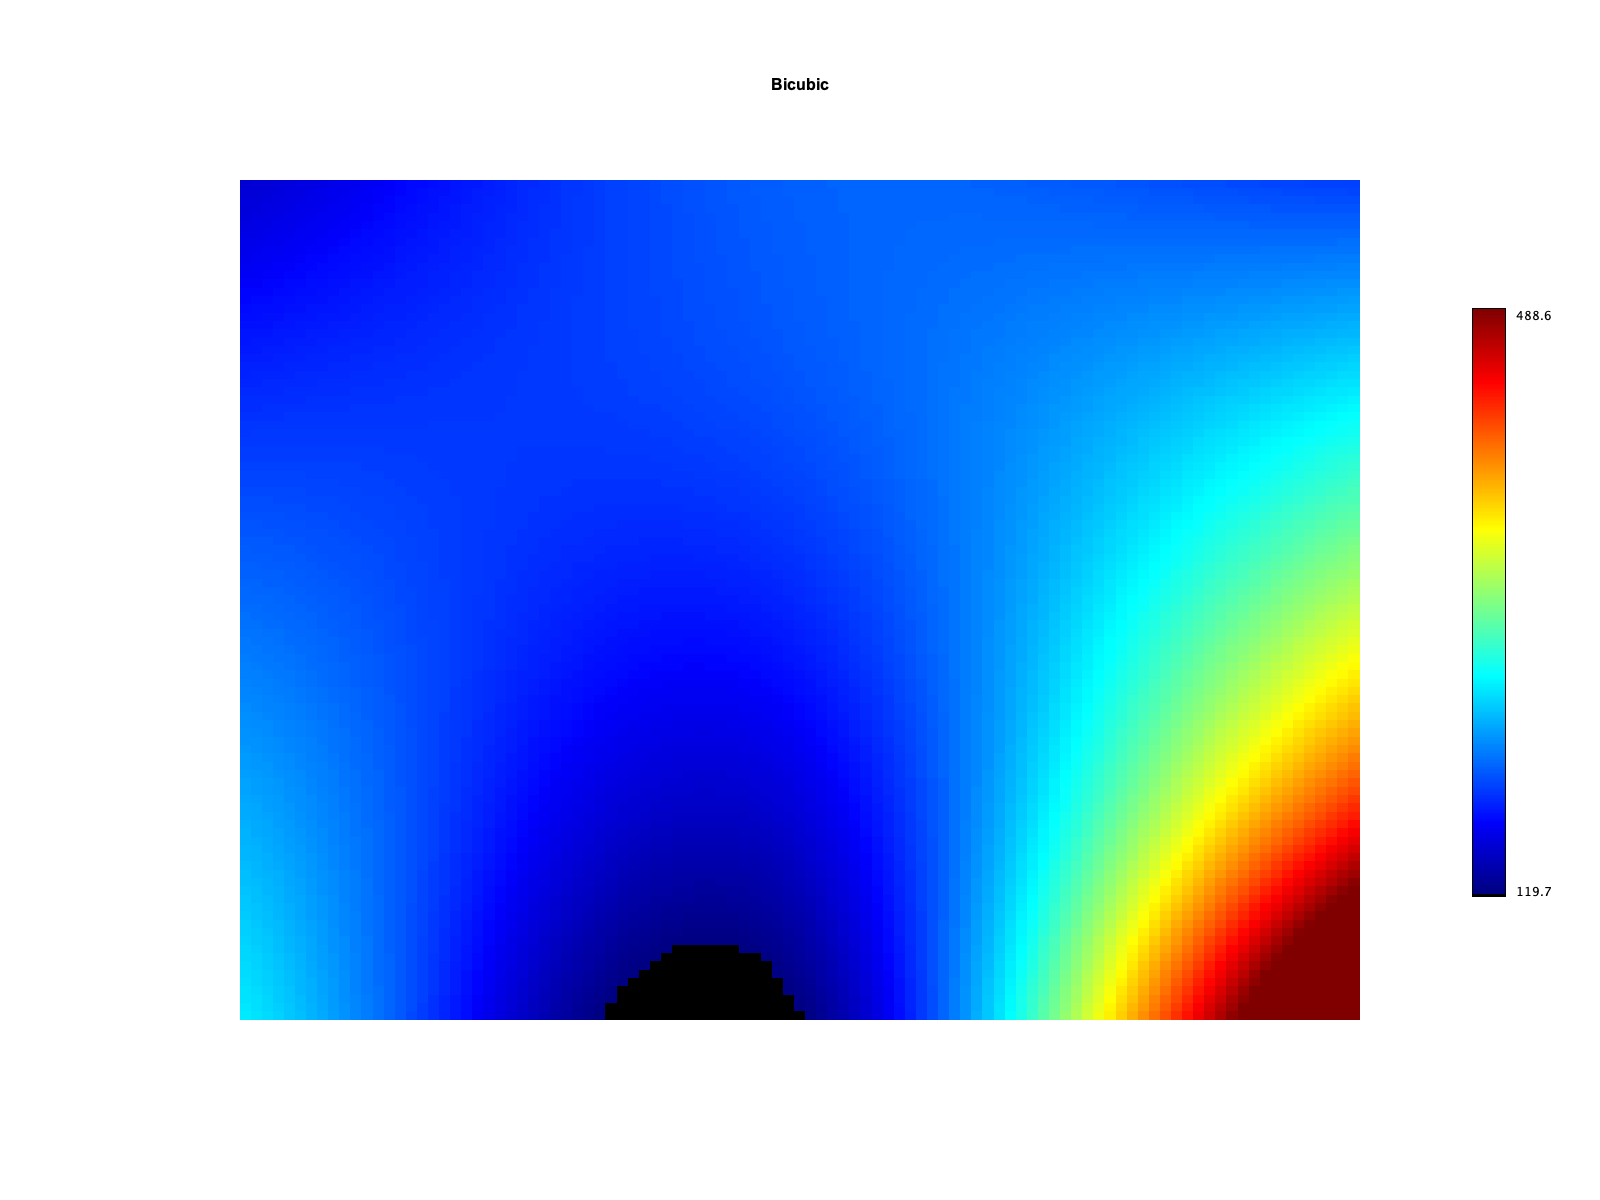

bicubic: BicubicInterpolation = BiCubic Interpolation
bicubicPlot: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res47_3: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [48]:
val bicubic = new BicubicInterpolation(x1, x2, y)

for (i <- 0 to 100; j <- 0 to 100)
    data(i)(j) = bicubic.interpolate(1950 + i*0.4, 10 + j*0.2)

val bicubicPlot = heatmap(data, Palette.jet(256))
bicubicPlot.setTitle("Bicubic")
show(bicubicPlot)

In image processing, bicubic interpolation is often chosen over bilinear interpolation or nearest neighbor in image resampling, when speed is not an issue. Images resampled with bicubic interpolation are smoother and have fewer interpolation artifacts.

## Laplace Interpolation
Laplace interpolation can restore missing or unmeasured values on a 2-dimensional evenly spaced regular grid. In some sense, Laplace interpolation produces the smoothest possible interpolant, which are obtained by solving a very sparse linear equations with biconjugate gradient method.


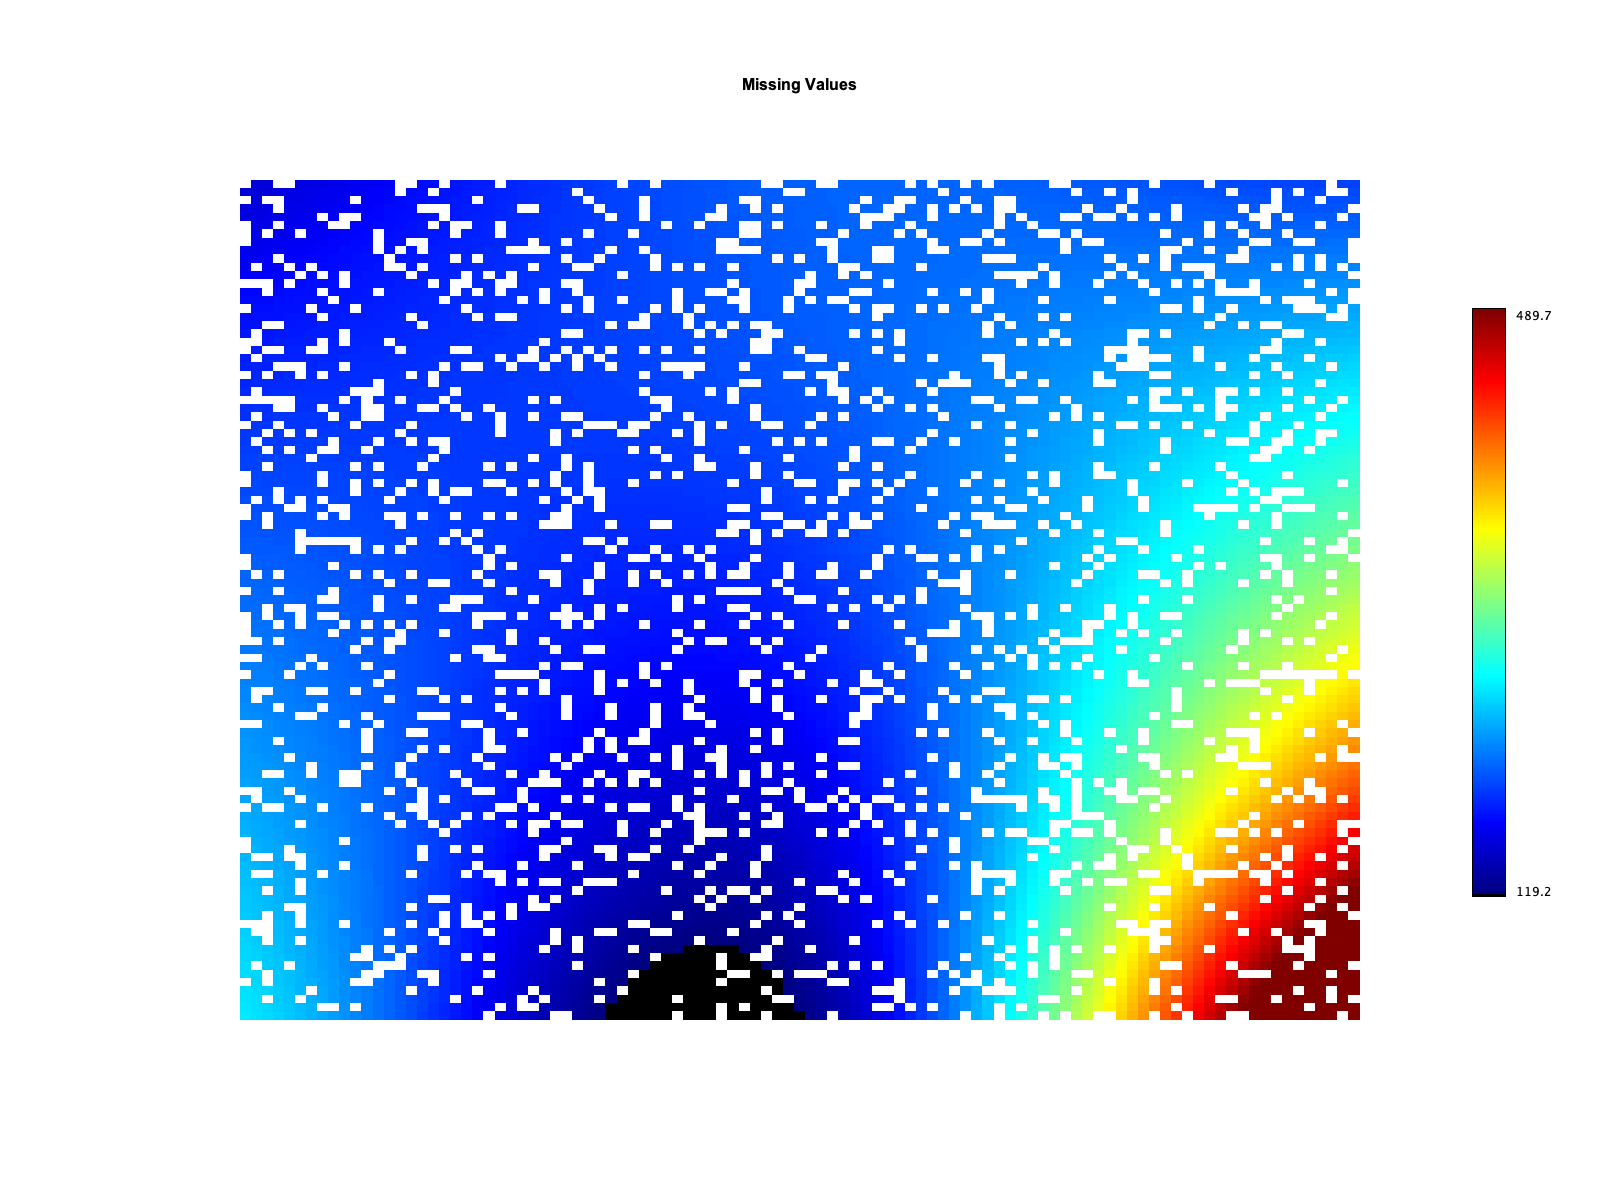

zz: Array[Array[Double]] = Array(
  Array(
    NaN,
    151.686828952,
    152.699542016,
    NaN,
    NaN,
    155.860379,
    156.950021632,
    158.055244936,
    159.174588224,
    160.306590808,
    161.449792,
    162.60273111200001,
    163.763947456,
    164.931980344,
    NaN,
    NaN,
    168.462371392,
    169.643063576,
    NaN,
    172.001526568,
    173.176376,
    174.346356472,
    175.51000729600003,
    NaN,
    177.81247724800002,
    178.94837500000003,
    180.072100352,
    181.182192616,
    182.27719110400002,
    183.35563512800002,
    184.416064,
    185.457017032,
    186.47703353600002,
    187.47465282400003,
    NaN,
    189.396857,
    190.31852051200002,
...
ww: Array[Array[Double]] = Array(
  Array(
    NaN,
    151.686828952,
    152.699542016,
    NaN,
    NaN,
    155.860379,
    156.950021632,
    158.055244936,
    159.174588224,
    160.306590808,
    161.449792,
    162.60273111200001,
    163.763947456,
    164.931980344,
    NaN,
    NaN,
    

In [49]:
val zz = Array.ofDim[Double](101, 101)
val ww = Array.ofDim[Double](101, 101)
for (i <- 0 to 100; j <- 0 to 100) {
  zz(i)(j) = if (java.lang.Math.random() < 0.2) Double.NaN else data(i)(j)
  ww(i)(j) = zz(i)(j)
}

val canvas = heatmap(ww, Palette.jet(256))
canvas.setTitle("Missing Values")
show(canvas)


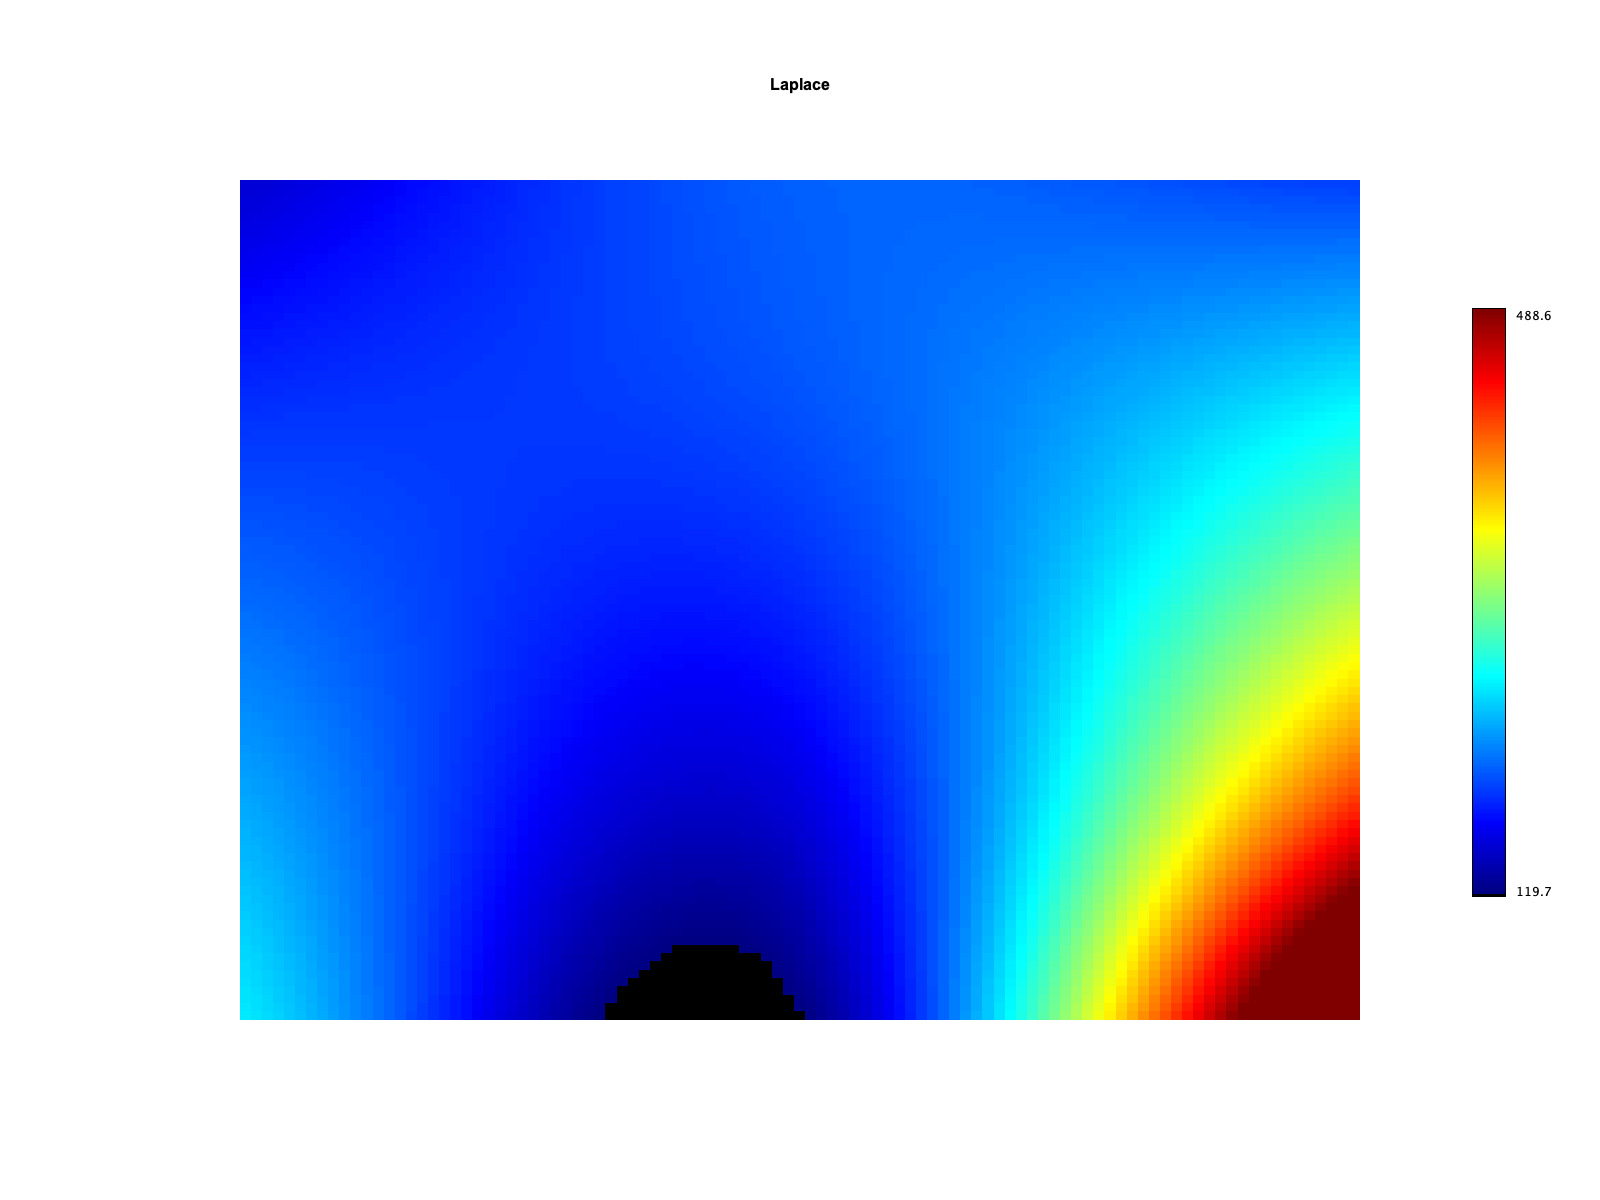

res49_0: Double = 7.404333682202688E-8
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res49_2: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@1fd8d1ab,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [50]:
LaplaceInterpolation.interpolate(zz)
val canvas = heatmap(zz, Palette.jet(256))
canvas.setTitle("Laplace")
show(canvas)